# Single Audit Explorer (File one): 
## Data Wrangling, 
## Exploratory Data Analysis (EDA) with Pandas Profiling, and
## Machine Learning with Lazy Predict
## Bayesian Posterior Probabilities


Data Source:  Audit Year 2020 https://facweb.census.gov/uploadpdf.aspx



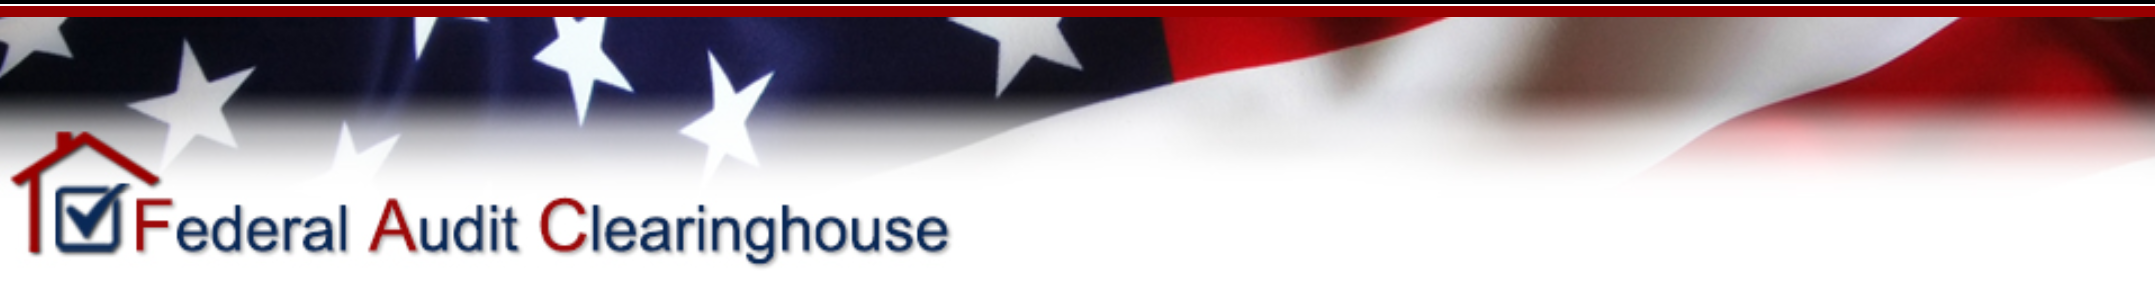

Part 1:  Data Wrangling

Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data. Data analysts typically spend the majority of their time in the process of data wrangling compared to the actual analysis of the data.

The process of data wrangling may include further munging, data visualization, data aggregation, training a statistical model, as well as many other potential uses. Data wrangling typically follows a set of general steps which begin with extracting the data in a raw form from the data source, "munging" the raw data (e.g. sorting) or parsing the data into predefined data structures, and finally depositing the resulting content into a data sink for storage and future use.[1]

Source:  https://en.wikipedia.org/wiki/Data_wrangling

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

In [2]:
#Load the data
#Data must be imported as a CSV UTF-8 (Comma Delimited) File from Excel or other app
#Choose Files from where they are located on your computer
from google.colab import files
uploaded = files.upload()

Saving gen20.csv to gen20.csv


In [3]:
#Convert csv file into a gen20_raw variable
gen20_raw = pd.read_csv("gen20.csv")
gen20_raw.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (17,64) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


AUDITYEAR   DBKEY  TYPEOFENTITY  FYENDDATE AUDITTYPE PERIODCOVERED  \
0       2020  100000           908  30-Sep-20         S             A   
1       2020  100001           908  31-Oct-20         S             A   
2       2020  100003           908  30-Apr-20         S             A   
3       2020  100010           909  30-Jun-20         S             A   
4       2020  100014           908  30-Jun-20         S             A   

   NUMBERMONTHS        EIN MULTIPLEEINS  EINSUBCODE  ...  TOTFEDEXPEND  \
0           NaN  730776899            N         NaN  ...     2695200.0   
1           NaN  730777705            N         NaN  ...    14528755.0   
2           NaN  730779703            N         NaN  ...     2291524.0   
3           NaN  730784599            N         NaN  ...     2424687.0   
4           NaN  730785251            N         NaN  ...     3531122.0   

  DATEFIREWALL PREVIOUSDATEFIREWALL REPORTREQUIRED  MULTIPLE_CPAS AUDITOR_EIN  \
0    19-Mar-21                  NaN            NaN              N   208209116   
1    21-Jul-21                  NaN            NaN              N   208209116   
2    12-Dec-20                  NaN            NaN              N   208209116   
3    27-Dec-20                  NaN            NaN              N   271494012   
4     2-Dec-20                  NaN            NaN              N   480573184   

  FACACCEPTEDDATE CPAFOREIGN CPACOUNTRY       ENTITY_TYPE  
0       17-Mar-21        NaN         US        Non-profit  
1       19-Jul-21        NaN         US        Non-profit  
2        3-Dec-20        NaN         US        Non-profit  
3       18-Dec-20        NaN         US  Local government  
4       20-Nov-20        NaN         US        Non-profit  

[5 rows x 67 columns]

In [4]:
# Audit Year 2020 Data Wrangling
gen20 = gen20_raw[['AUDITYEAR', 'DBKEY', 'TYPEOFENTITY', 'EIN', 'STATE', 'AUDITOR_EIN', 'COG_OVER', 'COGAGENCY', 
                   'OVERSIGHTAGENCY', 'TYPEREPORT_FS', 'GOINGCONCERN', 'REPORTABLECONDITION', 'MATERIALWEAKNESS', 'LOWRISK', 
                   'QCOSTS', 'TOTFEDEXPEND', 'CPACOUNTRY', 'TYPEREPORT_MP', 'REPORTABLECONDITION_MP', 'MATERIALWEAKNESS_MP']]
# Rename variables
gen20 = gen20.rename(columns = {'TYPEREPORT_FS': 'REPORT', 'MATERIALWEAKNESS': 'MW', 'REPORTABLECONDITION': 
                                'SD', 'QCOSTS': 'QC', 'GOINGCONCERN': 'GC', 'LOWRISK': 'LR', 'TYPEREPORT_MP': 'REPORT_MP',
                                'REPORTABLECONDITION_MP': 'SD_MP', 'MATERIALWEAKNESS_MP': 'MW_MP'})
# ENTITY_CAT = Entity Category:
# 0 = Tribes,
# 1 = Institute of Higher Education (IHE),
# 2 = Local Government,
# 3 = Non Profit,
# 4 = State Government,
# 5 = Unknown (not too many)    
    
# Create conditions
entity_conditions = [
    # 0 = Tribes
    (gen20['TYPEOFENTITY'] >= 600) & (gen20['TYPEOFENTITY'] < 700),
    
    # 1 = IHE
    (gen20['TYPEOFENTITY'] == 4) | (gen20['TYPEOFENTITY'] == 104) | (gen20['TYPEOFENTITY'] == 204) | 
    (gen20['TYPEOFENTITY'] == 304) | (gen20['TYPEOFENTITY'] == 504) | (gen20['TYPEOFENTITY'] == 604) |
    (gen20['TYPEOFENTITY'] == 704) | (gen20['TYPEOFENTITY'] == 714) | (gen20['TYPEOFENTITY'] == 904),
    
    # 2 = Local Government (+ Independent Special District + Independent Local Education Agency + Territory Local)
    (gen20['TYPEOFENTITY'] >= 100) & (gen20['TYPEOFENTITY'] < 504),
    (gen20['TYPEOFENTITY'] >= 710) & (gen20['TYPEOFENTITY'] < 808),
    (gen20['TYPEOFENTITY'] == 505),
    
    # 3 = Nonprofit
    (gen20['TYPEOFENTITY'] >= 901),
    
    # 4 = State (+ Territory)
    (gen20['TYPEOFENTITY'] >= 0) & (gen20['TYPEOFENTITY'] < 100),
    (gen20['TYPEOFENTITY'] >= 700) & (gen20['TYPEOFENTITY'] < 710),
    
    # 5 = Unknown (+ Out of Scope)
    (gen20['TYPEOFENTITY'] >= 808) | (gen20['TYPEOFENTITY'] == 888)
]

# Create outputs
entity_values = [0, 1, 2, 2, 2, 3, 4, 4, 5]

# Create new variable
gen20['ENTITY_CAT'] = np.select(entity_conditions, entity_values)

# Check output
gen20['ENTITY_CAT'].value_counts()
# STATE_CAT = State Category
# 0 = Northeast
# 1 = Midwest
# 2 = South
# 3 = West
# 4 = U.S. Territory

# Create conditions
region_conditions = [
    # Northeast
    (gen20['STATE'] == 'ME') | (gen20['STATE'] == 'NH') | (gen20['STATE'] == 'VT') | (gen20['STATE'] == 'MA') | 
    (gen20['STATE'] == 'RI') | (gen20['STATE'] == 'CT') | (gen20['STATE'] == 'NY') | (gen20['STATE'] == 'NJ') | 
    (gen20['STATE'] == 'PA'),
    
    # Midwest
    (gen20['STATE'] == 'OH') | (gen20['STATE'] == 'MI') | (gen20['STATE'] == 'IN') | (gen20['STATE'] == 'IL') | 
    (gen20['STATE'] == 'WI') | (gen20['STATE'] == 'MN') | (gen20['STATE'] == 'IA') | (gen20['STATE'] == 'MO') | 
    (gen20['STATE'] == 'ND') | (gen20['STATE'] == 'SD') | (gen20['STATE'] == 'NE') | (gen20['STATE'] == 'KS'),
    
    # South
    (gen20['STATE'] == 'DE') | (gen20['STATE'] == 'MD') | (gen20['STATE'] == 'DC') | (gen20['STATE'] == 'WV') | 
    (gen20['STATE'] == 'VA') | (gen20['STATE'] == 'KY') | (gen20['STATE'] == 'NC') | (gen20['STATE'] == 'TN') | 
    (gen20['STATE'] == 'SC') | (gen20['STATE'] == 'TN') | (gen20['STATE'] == 'GA') | (gen20['STATE'] == 'FL') | 
    (gen20['STATE'] == 'AL') | (gen20['STATE'] == 'MS') | (gen20['STATE'] == 'AR') | (gen20['STATE'] == 'LA') | 
    (gen20['STATE'] == 'OK'),
    
    # West
    (gen20['STATE'] == 'MT') | (gen20['STATE'] == 'WY') | (gen20['STATE'] == 'CO') | (gen20['STATE'] == 'NM') | 
    (gen20['STATE'] == 'ID') | (gen20['STATE'] == 'UT') | (gen20['STATE'] == 'AZ') | (gen20['STATE'] == 'WA') | 
    (gen20['STATE'] == 'OR') | (gen20['STATE'] == 'CA') | (gen20['STATE'] == 'NV') | (gen20['STATE'] == 'AK') | 
    (gen20['STATE'] == 'HI'),
    
    # U.S. Territory
    (gen20['STATE'] == 'AS') | (gen20['STATE'] == 'FM') | (gen20['STATE'] == 'GU') | (gen20['STATE'] == 'MH') | 
    (gen20['STATE'] == 'MP') | (gen20['STATE'] == 'PR') | (gen20['STATE'] == 'PW') | (gen20['STATE'] == 'VI'),
]

# Create outputs
region_values = [0, 1, 2, 3, 4]

# Create new variable
gen20['STATE_CAT'] = np.select(region_conditions, region_values)

# Check output
gen20['STATE_CAT'].value_counts()
# Check output
gen20['REPORT'].value_counts()

# REPORT = Type of Audit Opinion
# 0 = Clean (Unqualified)
# 1 = Not Clean (Adverse, Qualified, Disclaimer)
gen20 = gen20.replace({'REPORT': {'U': 0, 'UA': 1, 'UAD': 1, 'UD': 1,
                                  'UQ': 0, 'UQA': 0, 'UQAD': 0, 'UQD': 0, 
                                  'A': 1, 'AD': 1, 'AS': 1, 'D': 1,
                                  'Q': 1, 'QA': 1, 'QD': 1, 'S': 1}})

# Check output
gen20['REPORT'].value_counts()

gen20['REPORT_MP'].value_counts()

# REPORT = Type of Audit Opinion
# 0 = Clean (Unqualified)
# 1 = Not Clean (Adverse, Qualified, Disclaimer)
gen20 = gen20.replace({'REPORT_MP': {'U': 0, 'A': 1, 'D': 1,'Q': 1, 'QA': 1, 'QD': 1, 'QAD': 1, 'AD':2}})

# Check output
gen20['REPORT_MP'].value_counts()

# MW = Material Weakness
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'MW': {'N': 0, 'Y': 1}})

# SD = Significant Deficiency
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'SD': {'N': 0, 'Y': 1}})

# QC = Questioned Cost
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'QC': {'N': 0, 'Y': 1}})

# GC = Going Concern
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'GC': {'N': 0, 'Y': 1}})

# LR = Low Risk
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'LR': {'N': 0, 'Y': 1}})

# SD_MP = Significant Deficiency - Major Program
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'SD_MP': {'N': 0, 'Y': 1}})

# MW_MP = Material Weakness - Major Program
# 0 = No
# 1 = Yes
gen20 = gen20.replace({'MW_MP': {'N': 0, 'Y': 1}})

# SPENDING_CAT = Spending Quintile

# Convert variable to "float"
gen20['TOTFEDEXPEND'] = gen20['TOTFEDEXPEND'].astype(float)
#gen20.dtypes

# Cut 'TOTFEDEXPEND' into 5 equal buckets
gen20['SPENDING_CAT'] = pd.qcut(gen20['TOTFEDEXPEND'], 5, labels=False)

# Check output
gen20['SPENDING_CAT'].value_counts()

### Determine dollar spread of SPENDING_CAT - mean

# Turn off scientific notation
pd.set_option('display.float_format', lambda x: '%.0f' % x)

gen20.groupby(['SPENDING_CAT'])['TOTFEDEXPEND'].mean()

### Determine dollar spread of SPENDING_CAT - minimum
gen20.groupby(['SPENDING_CAT'])['TOTFEDEXPEND'].min()

### Determine dollar spread of SPENDING_CAT - maximum
gen20.groupby(['SPENDING_CAT'])['TOTFEDEXPEND'].max()

# Return normal format
pd.reset_option('display.float_format')

# COG_OVER_COMBINED = Combined Cognizant/Oversight Agency

# Where 'COG_OVER' is 'C', return value of 'COGAGENCY', else return value of 'OVERSIGHTAGENCY'
gen20['COG_OVER_COMBINED'] = np.where(gen20['COG_OVER'] == 'C', gen20['COGAGENCY'], gen20['OVERSIGHTAGENCY'])

gen20['COG_OVER_COMBINED'].value_counts()

### Convert new/recoded variables to categorical
gen20['ENTITY_CAT'] = gen20['ENTITY_CAT'].astype('category')

gen20['STATE_CAT'] = gen20['STATE_CAT'].astype('category')

gen20['SPENDING_CAT'] = gen20['SPENDING_CAT'].astype('category')

gen20['REPORT'] = gen20['REPORT'].astype('category')

gen20['REPORT_MP'] = gen20['REPORT_MP'].astype('category')

gen20['MW'] = gen20['MW'].astype('category')

gen20['MW_MP'] = gen20['MW_MP'].astype('category')

gen20['SD'] = gen20['SD'].astype('category')

gen20['SD_MP'] = gen20['SD_MP'].astype('category')

gen20['QC'] = gen20['QC'].astype('category')

gen20['GC'] = gen20['GC'].astype('category')

gen20['LR'] = gen20['LR'].astype('category')

gen20['CPACOUNTRY'] = gen20['CPACOUNTRY'].astype('category')

gen20['COGAGENCY'] = gen20['COGAGENCY'].astype('category')

gen20['OVERSIGHTAGENCY'] = gen20['OVERSIGHTAGENCY'].astype('category')

gen20['COG_OVER_COMBINED'] = gen20['COG_OVER_COMBINED'].astype('category')

gen20.dtypes

AUDITYEAR               int64
DBKEY                   int64
TYPEOFENTITY            int64
EIN                     int64
STATE                  object
AUDITOR_EIN            object
COG_OVER               object
COGAGENCY            category
OVERSIGHTAGENCY      category
REPORT               category
GC                   category
SD                   category
MW                   category
LR                   category
QC                   category
TOTFEDEXPEND          float64
CPACOUNTRY           category
REPORT_MP            category
SD_MP                category
MW_MP                category
ENTITY_CAT           category
STATE_CAT            category
SPENDING_CAT         category
COG_OVER_COMBINED    category
dtype: object

Part Two: Exploratory Data Analysis (EDA)

In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling and thereby contrasts traditional hypothesis testing. Exploratory data analysis has been promoted by John Tukey since 1970 to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA),[1][2] which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.  

Source:  https://en.wikipedia.org/wiki/Exploratory_data_analysis

In [5]:
# Install Pandas Profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 21.9 MB 138 kB/s
     |████████████████████████████████| 596 kB 13.9 MB/s 
     |████████████████████████████████| 102 kB 78.7 MB/s 
     |████████████████████████████████| 690 kB 72.2 MB/s 
     |████████████████████████████████| 4.7 MB 58.6 MB/s 
     |████████████████████████████████| 62 kB 1.6 MB/s 
     |████████████████████████████████| 812 kB 82.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=261257 sha256=4e518662927a0621b3721428b63d16ba81e5facd72154ad3006dc03232b811cd
  Stored in directory: /tmp/pip-ephem-wheel-cache-gddeopef/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=890053e71988c6c9690a57672c10a40ee52508d3e90592ce89bf5778085b2198
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d250ba86876882394

In [6]:
# Imports
from pandas_profiling import ProfileReport
# Import additional dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling as pp

warnings.filterwarnings('ignore')
%matplotlib inline

In [7]:
# Run Pandas Profile Report with gen20 variable
pp.ProfileReport(gen20)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Part Three:  Lazy Predict

Lazy Predict helps build a lot of basic models without much code and helps understand which models works better without any parameter tuning.

Free software: MIT license
Documentation: https://lazypredict.readthedocs.io.

In [8]:
# Instal Lazypredict
! pip install lazypredict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.2 MB 12.8 MB/s 
     |████████████████████████████████| 302 kB 56.5 MB/s 
     |████████████████████████████████| 127.6 MB 78.2 MB/s 
     |████████████████████████████████| 6.8 MB 57.7 MB/s 
     |████████████████████████████████| 269 kB 70.2 MB/s 
     |████████████████████████████████| 10.1 MB 45.0 MB/s 
     |████████████████████████████████| 14.5 MB 63.1 MB/s 
     |████████████████████████████████| 72 kB 1.0 MB/s 
     |████████████████████████████████| 248 kB 83.6 MB/s 
     |████████████████████████████████| 25.9 MB 7.3 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=6463fb806db0514de3fbc94b88fedd236fbb33f190006891b13d17a3b4c3290e
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: n

In [9]:
# Imports
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [10]:
#Set Class_Val_num as response variable target and all other variables as predictors.
gen20_sample=gen20[['ENTITY_CAT','STATE_CAT','REPORT_MP','MW_MP','SD_MP','QC']]
target = 'REPORT_MP'

gen20_sample['ENTITY_CAT']=pd.to_numeric(gen20_sample['ENTITY_CAT'])
gen20_sample['STATE_CAT']=pd.to_numeric(gen20_sample['STATE_CAT'])
gen20_sample['REPORT_MP']=pd.to_numeric(gen20_sample['REPORT_MP'])
gen20_sample['SD_MP']=pd.to_numeric(gen20_sample['SD_MP'])
gen20_sample['MW_MP']=pd.to_numeric(gen20_sample['MW_MP'])
gen20_sample['QC']=pd.to_numeric(gen20_sample['QC'])

gen20_sample=gen20_sample.dropna()

gen20_sample=gen20_sample.sample(frac=0.5)

X = gen20_sample.loc[:,gen20_sample.columns != target]
y = gen20_sample.loc[:,gen20_sample.columns == target]

# Set up training and testing data set with an 80-20 split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

# lazyClassifer Algorithm
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 29/29 [00:18<00:00,  1.59it/s]


Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
QuadraticDiscriminantAnalysis      0.95               0.87     0.87      0.96   
NearestCentroid                    0.95               0.87     0.87      0.96   
GaussianNB                         0.95               0.87     0.87      0.96   
LinearDiscriminantAnalysis         0.96               0.81     0.81      0.97   
PassiveAggressiveClassifier        0.96               0.81     0.81      0.97   
Perceptron                         0.96               0.81     0.81      0.97   
KNeighborsClassifier               0.98               0.65     0.65      0.97   
BernoulliNB                        0.97               0.65     0.65      0.97   
AdaBoostClassifier                 0.97               0.65     0.65      0.97   
LogisticRegression                 0.98               0.64     0.64      0.97   
XGBClassifier                      0.98               0.63     0.63      0.97   
LGBMClassifier                     0.98               0.63     0.63      0.97   
BaggingClassifier                  0.98               0.63     0.63      0.97   
LabelSpreading                     0.98               0.62     0.62      0.97   
LabelPropagation                   0.98               0.62     0.62      0.97   
RandomForestClassifier             0.98               0.62     0.62      0.97   
ExtraTreesClassifier               0.98               0.62     0.62      0.97   
DecisionTreeClassifier             0.98               0.61     0.61      0.97   
SVC                                0.98               0.61     0.61      0.97   
ExtraTreeClassifier                0.98               0.61     0.61      0.97   
RidgeClassifier                    0.98               0.61     0.61      0.97   
RidgeClassifierCV                  0.98               0.61     0.61      0.97   
CalibratedClassifierCV             0.98               0.61     0.61      0.97   
LinearSVC                          0.98               0.61     0.61      0.97   
SGDClassifier                      0.97               0.58     0.58      0.97   
DummyClassifier                    0.95               0.49     0.49      0.95   

                               Time Taken  
Model                                      
QuadraticDiscriminantAnalysis        0.04  
NearestCentroid                      0.03  
GaussianNB                           0.02  
LinearDiscriminantAnalysis           0.07  
PassiveAggressiveClassifier          0.04  
Perceptron                           0.04  
KNeighborsClassifier                 0.67  
BernoulliNB                          0.03  
AdaBoostClassifier                   0.40  
LogisticRegression                   0.13  
XGBClassifier                        0.30  
LGBMClassifier                       0.14  
BaggingClassifier                    0.09  
LabelSpreading                       6.58  
LabelPropagation                     4.00  
RandomForestClassifier               0.57  
ExtraTreesClassifier                 0.50  
DecisionTreeClassifier               0.04  
SVC                                  0.77  
ExtraTreeClassifier                  0.04  
RidgeClassifier                      0.04  
RidgeClassifierCV                    0.04  
CalibratedClassifierCV               2.75  
LinearSVC                            0.79  
SGDClassifier                        0.07  
DummyClassifier                      0.03

Part Four:  Bayesian Posterior Probabilities Audit Year 2020

In [11]:
#Import libraries
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

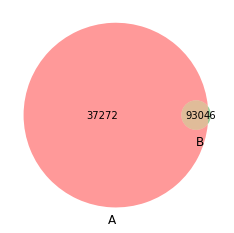

In [12]:
#Audit Year 2020: 
venn2(subsets = (37272, 46, 930))
plt.show()

In [13]:
# Source:  Code Based on Homework 1 Probability Review and Priors UVA DS 6040
#Imports
import numpy as np
import pandas as pd
# import matplotlib
import matplotlib.pyplot as plt
# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
sns.set(rc={'figure.figsize':(9.5,5)})

In [14]:
#Define and Run the posterior_from_conjugate_prior function provided in class.
from scipy.stats import binom
from scipy.stats import beta

def posterior_from_conjugate_prior(**kwargs):
    if kwargs['Likelihood_Dist_Type'] == 'Binomial':
        # Get the parameters for the likelihood and prior distribution from the key word arguments.
        x = kwargs['x'] # This is state space of possible values for p = 'probability of success' in [0,1]
        n = kwargs['n'] # This is the number of Bernoili trials.
        k = kwargs['k'] # This is the number of 'successes'.
        a = kwargs['a'] # This is the parameter alpha for the prior Beta distribution
        b = kwargs['b'] # This is the parameter beta for the prior Beta distribution
        
        print(f'a_prime = {k + a}.')
        print(f'b_prime = {n - k + b}.')
        Likelihood = binom.pmf(p=x, n=n, k=k)
        Prior = beta.pdf(x=x, a=a, b=b)
        Posterior = beta.pdf(x=x, a=k+a, b=n-k+b)
        
        return [Prior, Likelihood, Posterior]
                    
    else:
        print('Distribution type not supported.')    

a_prime = 35863.
b_prime = 3343.
a_prime = 37368.
b_prime = 1838.
a_prime = 38002.
b_prime = 1204.


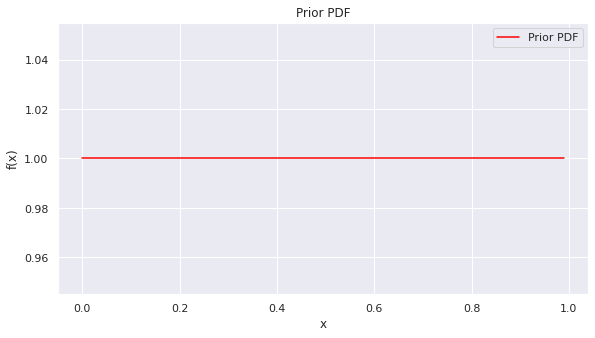

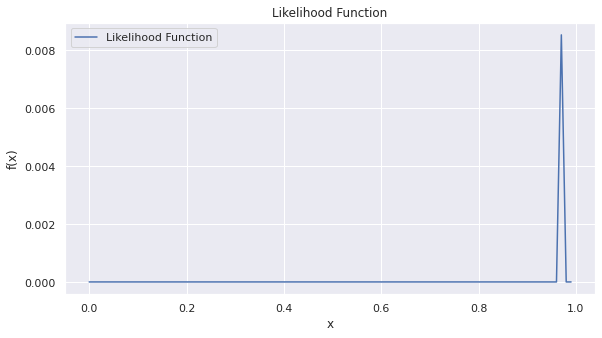

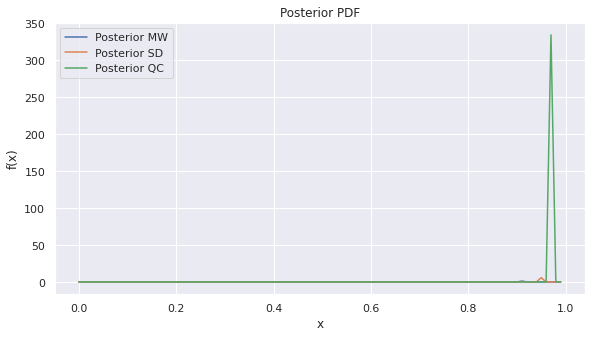

In [15]:
# Audit Year 2020 Results, assuming a flat prior
x = np.arange(0, 1, 0.01)

Prior, Likelihood, Posterior_MW = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=39204, #Number of Audits
    k=35862, #Number of Successful audits without MWs
    a=1, 
    b=1)    

Prior, Likelihood, Posterior_SD = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=39204, #Number of Audits
    k=37367, #Number of Successful audits without SDs
    a=1, 
    b=1)   

Prior, Likelihood, Posterior_QC = posterior_from_conjugate_prior(
    Likelihood_Dist_Type='Binomial', 
    x=x, 
    n=39204, #Number of Audits
    k=38001, ##Number of Successful audits without QC
    a=1, 
    b=1)  

ax1 = sns.lineplot(x, Prior, color='red')
ax1.set(xlabel='x', ylabel='f(x)', title=f'Prior PDF');
plt.legend(labels=['Prior PDF']);
plt.show()

ax2 = sns.lineplot(x, Likelihood)
ax2.set(xlabel='x', ylabel='f(x)', title=f'Likelihood Function');
plt.legend(labels=['Likelihood Function']);
plt.show()

ax3 = sns.lineplot(x, Posterior_MW, label='Posterior MW')
ax3 = sns.lineplot(x, Posterior_SD, label='Posterior SD')
ax3 = sns.lineplot(x, Posterior_QC, label='Posterior QC')
ax3.set(xlabel='x', ylabel='f(x)', title=f'Posterior PDF');
plt.legend();
plt.show()